In [1]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

random.seed(231)
# Initialize Parameters for Testing
learning_rate = 0.001
time_steps = 100
window = 4
epochs = 1500

In [14]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[0] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i] for i in range(0,600,6)]

#Sin training set
sin_set = [float((np.sin(x/2))) for x in range(time_steps)] 

In [3]:
# Initialize Network with Nguyen_Widrow weighting
x1_network = RNN(window, 3, 1)
# x1_network.nguyen_widrow()
# Train Network on First Training Set
error = x1_network.train(training_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)

Epoch 0 	MSE 1.2234999731187508
Epoch 100 	MSE 0.5756151028831277
Epoch 200 	MSE 0.5607048455826873
Epoch 300 	MSE 0.5400226057240536
Epoch 400 	MSE 0.5167051806297205
Epoch 500 	MSE 0.48137039388710984
Epoch 600 	MSE 0.3187934316614421
Epoch 700 	MSE 0.26881537521519244
Epoch 800 	MSE 0.24411078778933676
Epoch 900 	MSE 0.22645206341859542
Epoch 1000 	MSE 0.2142930720322279
Epoch 1100 	MSE 0.20571258712544477
Epoch 1200 	MSE 0.19908462175416602
Epoch 1300 	MSE 0.19628161416909493
Epoch 1400 	MSE 0.19877353662054775


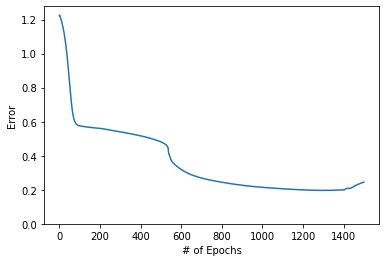

In [10]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

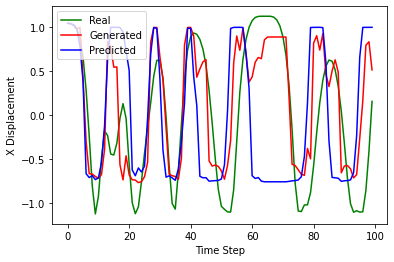

In [15]:
x = training_set[0:4]
x_generated = [*x] #First 4 timesteps come from the original function
x_predicted = [*x]
for time in range(window,time_steps):
    _, y, _ = x1_network.feed_forward(training_set[time-window:time])
    _, z, _ = x1_network.feed_forward(x)
    # x = z
    x.append(float(z[0]))
    x = x[1:]
    x_predicted.append(*z)
    x_generated.append(*y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:time_steps], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

In [6]:
print(x1_network.u)
print(np.array(x1_network.w))
print(np.array(x1_network.v))

[1.462667738422863, 1.4646941354973704, -0.6205204645849522]
[[ 2.56075915]
 [ 0.78869724]
 [ 2.29015699]
 [-7.67244744]]
[[ 1.10154171  1.33280048  1.1345086 ]
 [ 1.5582151   2.01529719  1.58005698]
 [ 2.29934746 -1.0164534   1.04552202]
 [ 1.2940802  -0.58369856 -1.65331497]
 [ 0.59683577  2.10778891 -2.36232054]]


In [7]:
print(np.clip(x1_network.h, -1, 1))

[-0.06221656 -0.06221769 -0.78651299]


In [9]:
print(error[-1])

0.24522259085864614


In [19]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
x_1_set = [row[0] for row in training_set]
y_1_set = [row[1] for row in training_set]
x_2_set = [row[2] for row in training_set]
y_2_set = [row[3] for row in training_set]
y1_network = RNN(window, 3, 1)
x2_network = RNN(window, 3, 1)
y2_network = RNN(window, 3, 1)
# Clip Into 6 training sets
y_1_set = [y_1_set[i] for i in range(0,600,6)]
x_2_set = [x_2_set[i] for i in range(0,600,6)]
y_2_set = [y_2_set[i] for i in range(0,600,6)]
training_set = [training_set[i] for i in range(0,600,6)]

error1 = y1_network.train(y_1_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)
error2 = x2_network.train(x_2_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)
error3 = y2_network.train(y_2_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)

Epoch 0 	MSE 0.6656515990732198
Epoch 100 	MSE 0.46979079981087674
Epoch 200 	MSE 0.422716801350129
Epoch 300 	MSE 0.4017354944727294
Epoch 400 	MSE 0.38312351904681885
Epoch 500 	MSE 0.36532947513343883
Epoch 600 	MSE 0.35115484927728075
Epoch 700 	MSE 0.34084912456201494
Epoch 800 	MSE 0.32984499284405433
Epoch 900 	MSE 0.31357705842966205
Epoch 1000 	MSE 0.2984073470880877
Epoch 1100 	MSE 0.28357043982228974
Epoch 1200 	MSE 0.2666264592658428
Epoch 1300 	MSE 0.24515089742916907
Epoch 1400 	MSE 0.21671987929489434
Epoch 0 	MSE 1.0692227127504328
Epoch 100 	MSE 0.8342970536642963
Epoch 200 	MSE 0.7159926806254182
Epoch 300 	MSE 0.6342283287388473
Epoch 400 	MSE 0.5344103705274263
Epoch 500 	MSE 0.4575160077324908
Epoch 600 	MSE 0.43552313338632914
Epoch 700 	MSE 0.4221638860225201
Epoch 800 	MSE 0.4113281381647031
Epoch 900 	MSE 0.4069265538794382
Epoch 1000 	MSE 0.39696456909083344
Epoch 1100 	MSE 0.39146025664416706
Epoch 1200 	MSE 0.3885626899502317
Epoch 1300 	MSE 0.38655217066428

<Figure size 432x288 with 0 Axes>

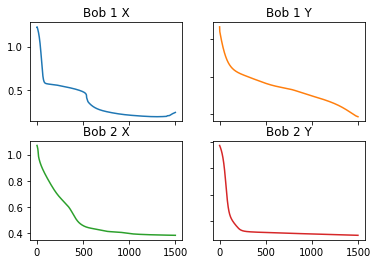

In [21]:
data = training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]

plt.figure(2)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(error)
axs[0, 0].set_title('Bob 1 X')
axs[0, 1].plot(error1, 'tab:orange')
axs[0, 1].set_title('Bob 1 Y')
axs[1, 0].plot(error2, 'tab:green')
axs[1, 0].set_title('Bob 2 X')
axs[1, 1].plot(error3, 'tab:red')
axs[1, 1].set_title('Bob 2 Y')
for ax in fig.get_axes():
    ax.label_outer()
plt.show()